Import Packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Model Version2 (Lasso & Ridge)

In [2]:
# import data version1
%store -r train_v2
%store -r test_v2

In [3]:
# Split train data into training set and testing set
X = train_v2.drop(['id', 'saleprice'], axis=1)
y = np.log(train_v2['saleprice'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# Build a lr model
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [6]:
# Build a lasso model
# I choose Lasso since I have so many features here
# to avoid overfitting, I want Lasso to zero out some unnecessary features
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_model = LassoCV(alphas=l_alphas, cv=5)

# Fit model using best ridge alpha!
lasso_model = lasso_model.fit(X_train, y_train)

In [7]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 5, 100)
# Generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

# Cross-validate over our list of ridge alphas.
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_model = ridge_model.fit(X_train, y_train)

Evaluate the model performance

In [8]:
# cross validation
# check lr model
cross_val_score(lr, X_train, y_train, cv=5).mean()

-2.779111663855247e+22

In [9]:
# check lasso model
cross_val_score(lasso_model, X_train, y_train, cv=5).mean()

0.8666242710197555

In [10]:
# check ridge model
cross_val_score(ridge_model, X_train, y_train, cv=5).mean()

0.8706565185802662

In [11]:
# check r2 score for lr
# predict X_train and X_test
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
# check r^2 score on training and testing set
print(r2_score(y_train, y_pred_train_lr))
print(r2_score(y_test, y_pred_test_lr))

0.9378249348841992
-3.27372711302089e+19


In [12]:
# check r2 score for lasso
# predict X_train and X_test
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)
# check r^2 score on training and testing set
print(r2_score(y_train, y_pred_train_lasso))
print(r2_score(y_test, y_pred_test_lasso))

0.9294635243266027
0.8768274777446767


In [13]:
# check r2 score for ridge
# predict X_train and X_test
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)
# check r^2 score on training and testing set
print(r2_score(y_train, y_pred_train_ridge))
print(r2_score(y_test, y_pred_test_ridge))

0.9231888611161005
0.8835898544026896


In [14]:
# check MSE of the model
def MSE(y, y_hat):
    return np.mean((y-y_hat)**2)

# check MSE for lasso
print(MSE(y_train,y_pred_train_lasso))
print(MSE(y_test,y_pred_test_lasso))

0.011842010444514977
0.021336305371363145


In [15]:
# check MSE for ridge
print(MSE(y_train,y_pred_train_ridge))
print(MSE(y_test,y_pred_test_ridge))

0.012895431763984224
0.020164906663521033


In [43]:
# check MSE for lr
print(MSE(y_train,y_pred_train_lr))
print(MSE(y_test,y_pred_test_lr))

0.010438255717493954
5.670846070776635e+18


Predict the test data

In [16]:
# I decided to use lasso model since it performs much better than lr
test_predict= test_v2.drop(['id'], axis=1)

In [17]:
# use lasso to predict
predict_result_log_lasso = lasso_model.predict(test_predict)
predict_result_lasso = np.exp(predict_result_log_lasso)

In [18]:
# take a peak at the first 10 price
predict_result_lasso[0:10]

array([125063.07975559, 157980.44038002, 220091.74335163,  97326.63681729,
       172133.68885888,  94061.37544356, 107387.55051366, 151351.07006516,
       183227.81613906, 165637.8644953 ])

In [19]:
# use ridge to predict
predict_result_log_ridge = ridge_model.predict(test_predict)
predict_result_ridge = np.exp(predict_result_log_ridge)

In [20]:
# take a peak at the first 10 price
predict_result_ridge[0:10]

array([111349.60234672, 162260.70971204, 227619.5790372 ,  96800.64760459,
       176187.89863797,  95392.4649013 , 104974.7883363 , 153556.33364232,
       171409.98592854, 166288.33979042])

In [21]:
test_v2 = test_v2.rename({'id': 'Id'}, axis=1)
test_v2= test_v2.reset_index()

In [22]:
# result for lasso

In [23]:
predict_result_v2_lasso = pd.DataFrame(predict_result_lasso, columns=['SalePrice'])

In [24]:
kg_v2_lasso = pd.DataFrame({'Id':test_v2['Id'], 'saleprice': predict_result_v2_lasso['SalePrice']})

In [25]:
kg_v2_lasso.to_csv('./datasets/kaggle_submission_v2_lasso.csv', index=False)

In [26]:
# result for ridge

In [27]:
predict_result_v2_ridge = pd.DataFrame(predict_result_ridge, columns=['SalePrice'])

In [28]:
kg_v2_ridge = pd.DataFrame({'Id':test_v2['Id'], 'saleprice': predict_result_v2_ridge['SalePrice']})

In [29]:
kg_v2_ridge.to_csv('./datasets/kaggle_submission_v2_ridge.csv', index=False)

In [30]:
kg_v2_lasso.head()

,Id,saleprice
0,2658,125063.079756
1,2718,157980.440380
2,2414,220091.743352
3,1989,97326.636817
4,625,172133.688859


In [40]:
kg_v2_ridge.head()

,Id,saleprice
0,2658,111349.602347
1,2718,162260.709712
2,2414,227619.579037
3,1989,96800.647605
4,625,176187.898638


Text(0.5, 1.0, 'lasso-training')

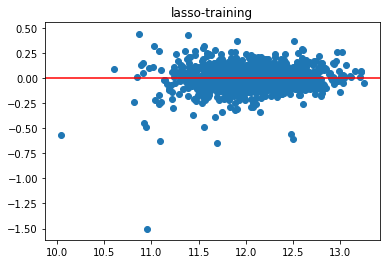

In [46]:
residuals_lasso = y_train - y_pred_train_lasso
plt.scatter(y_pred_train_lasso, residuals_lasso)
plt.axhline(0, color='r')
plt.title('lasso-training')

Text(0.5, 1.0, 'lasso-testing')

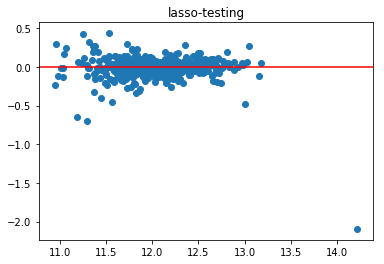

In [47]:
residuals_lasso = y_test - y_pred_test_lasso
plt.scatter(y_pred_test_lasso, residuals_lasso)
plt.axhline(0, color='r')
plt.title('lasso-testing')

Text(0.5, 1.0, 'ridge-training')

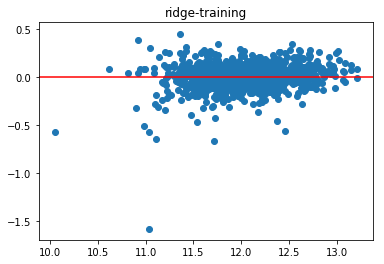

In [48]:
residuals_ridge = y_train - y_pred_train_ridge
plt.scatter(y_pred_train_ridge, residuals_ridge)
plt.axhline(0, color='r')
plt.title('ridge-training')

Text(0.5, 1.0, 'ridge-testing')

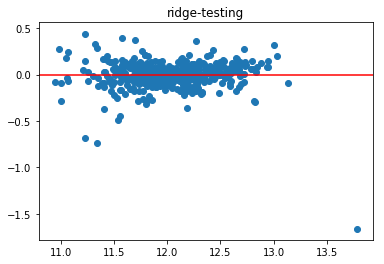

In [50]:
residuals_ridge = y_test - y_pred_test_ridge
plt.scatter(y_pred_test_ridge, residuals_ridge)
plt.axhline(0, color='r')
plt.title('ridge-testing')

Text(0.5, 1.0, 'lr-training')

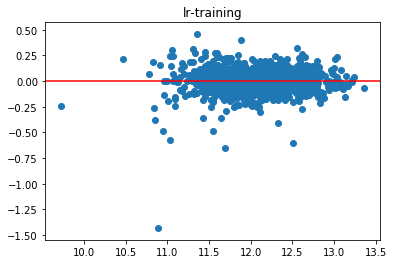

In [51]:
residuals_lr = y_train - y_pred_train_lr
plt.scatter(y_pred_train_lr, residuals_lr)
plt.axhline(0, color='r')
plt.title('lr-training')

Text(0.5, 1.0, 'lr-testing')

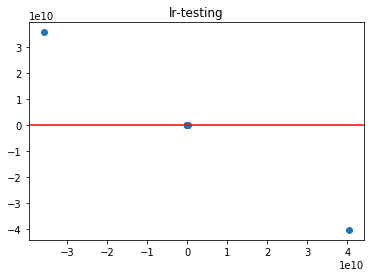

In [54]:
residuals_lr = y_test - y_pred_test_lr
plt.scatter(y_pred_test_lr, residuals_lr)
plt.axhline(0, color='r')
plt.title('lr-testing')

In [57]:
np.round(lasso_model.coef_,3)

array([ 0.033, -0.   ,  0.082,  0.041,  0.018,  0.001,  0.008,  0.   ,
        0.015,  0.002, -0.002,  0.026,  0.016,  0.007,  0.007,  0.   ,
       -0.003,  0.017,  0.   , -0.021,  0.004,  0.013,  0.   ,  0.   ,
        0.019,  0.005,  0.   ,  0.   ,  0.015,  0.007,  0.003,  0.003,
        0.001,  0.014,  0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ,
        0.015,  0.005,  0.058, -0.051,  0.   ,  0.139,  0.006, -0.014,
        0.   ,  0.   ,  0.   , -0.   ,  0.001,  0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.008, -0.   , -0.   , -0.018, -0.017,  0.002,
        0.   ,  0.   , -0.008,  0.006, -0.   ,  0.   , -0.   ,  0.004,
       -0.   ,  0.   ,  0.001, -0.   , -0.   , -0.   ,  0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.003, -0.   ,  0.012, -0.008, -0.   ,
       -0.   ,  0.01 , -0.   , -0.009,  0.001, -0.   ,  0.   , -0.   ,
        0.   ,  0.017, -0.007, -0.   , -0.   , -0.002,  0.009,  0.008,
        0.001, -0.001, -0.007, -0.   ,  0.005,  0.002,  0.004, -0.004,
      

In [58]:
lasso_model.intercept_

12.024128775000666